In [1]:
options(warn=-1)
library('tidyr')
library('ggplot2')
library('dplyr')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Loading the Dataset
bike_buyers=read.csv("bike_buyers.csv")
head(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [3]:
tail(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
995,13466,Married,Male,80000,5,Partial College,Professional,Yes,3,1-2 Miles,North America,46,No
996,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
997,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
998,11809,Married,,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
999,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No
1000,12121,Single,Male,60000,3,High School,Professional,Yes,2,10+ Miles,North America,53,Yes


### Display their Data Types

In [4]:
typeof(bike_buyers)

[1] "list"

In [5]:
class(bike_buyers)

[1] "data.frame"

In [6]:
str(bike_buyers)

'data.frame':	1000 obs. of  13 variables:
 $ ID              : int  12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital.Status  : chr  "Married" "Married" "Married" "Single" ...
 $ Gender          : chr  "Female" "Male" "Male" "" ...
 $ Income          : int  40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int  1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : chr  "Bachelors" "Partial College" "Partial College" "Bachelors" ...
 $ Occupation      : chr  "Skilled Manual" "Clerical" "Professional" "Professional" ...
 $ Home.Owner      : chr  "Yes" "Yes" "No" "Yes" ...
 $ Cars            : int  0 1 2 1 0 0 4 0 2 1 ...
 $ Commute.Distance: chr  "0-1 Miles" "0-1 Miles" "2-5 Miles" "5-10 Miles" ...
 $ Region          : chr  "Europe" "Europe" "Europe" "Pacific" ...
 $ Age             : int  42 43 60 41 36 50 33 43 58 NA ...
 $ Purchased.Bike  : chr  "No" "No" "No" "Yes" ...


### Display the Variable Names

In [7]:
is(bike_buyers)

[1] "data.frame" "list"       "oldClass"   "vector"     "listOrNULL"

### Columns name

In [8]:
col=names(bike_buyers)
print(col)

 [1] "ID"               "Marital.Status"   "Gender"           "Income"          
 [5] "Children"         "Education"        "Occupation"       "Home.Owner"      
 [9] "Cars"             "Commute.Distance" "Region"           "Age"             
[13] "Purchased.Bike"  


In [9]:
colnames(bike_buyers)

[1] "ID"               "Marital.Status"   "Gender"           "Income"          
 [5] "Children"         "Education"        "Occupation"       "Home.Owner"      
 [9] "Cars"             "Commute.Distance" "Region"           "Age"             
[13] "Purchased.Bike"

### structure of the dataframe

In [10]:
summary(bike_buyers)

       ID        Marital.Status        Gender              Income      
 Min.   :11000   Length:1000        Length:1000        Min.   : 10000  
 1st Qu.:15291   Class :character   Class :character   1st Qu.: 30000  
 Median :19744   Mode  :character   Mode  :character   Median : 60000  
 Mean   :19966                                         Mean   : 56268  
 3rd Qu.:24471                                         3rd Qu.: 70000  
 Max.   :29447                                         Max.   :170000  
                                                       NA's   :6       
    Children     Education          Occupation         Home.Owner       
 Min.   :0.00   Length:1000        Length:1000        Length:1000       
 1st Qu.:0.00   Class :character   Class :character   Class :character  
 Median :2.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.91                                                           
 3rd Qu.:3.00                                              

### Handling Duplicates

In [11]:
sum(duplicated(bike_buyers))

[1] 0

### Handling Empty cells

In [12]:
subset(bike_buyers, trimws(Marital.Status) == "")

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
9,22155,,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
28,18283,,Female,100000,0,Bachelors,Professional,No,1,5-10 Miles,Pacific,40,No
50,14939,,Male,40000,0,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,39,Yes
99,19441,,Male,40000,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,NA,Yes
151,26154,,Male,60000,1,Partial College,Skilled Manual,Yes,1,5-10 Miles,Pacific,43,Yes
235,24611,,Male,90000,0,Bachelors,Professional,No,4,10+ Miles,Pacific,35,Yes
302,17926,,Female,NA,0,Bachelors,Clerical,No,0,0-1 Miles,Pacific,28,Yes


In [13]:
subset(bike_buyers, trimws(Gender) == "")

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
4,24381,Single,,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
155,23426,Single,,80000,5,Graduate Degree,Management,Yes,3,0-1 Miles,Pacific,40,No
336,24369,Married,,80000,5,Graduate Degree,Management,No,2,0-1 Miles,Pacific,39,No
602,29231,Single,,80000,4,Partial College,Professional,No,2,0-1 Miles,North America,43,No
689,11699,Single,,60000,NA,Bachelors,Skilled Manual,No,2,0-1 Miles,North America,NA,No
696,18390,Married,,80000,5,Partial College,Professional,Yes,2,0-1 Miles,North America,44,No
868,26693,Married,,70000,3,Partial College,Professional,Yes,1,5-10 Miles,North America,49,No
909,23195,Single,,50000,3,Bachelors,Skilled Manual,Yes,2,2-5 Miles,North America,41,Yes
952,22296,Married,,70000,0,Bachelors,Professional,No,1,0-1 Miles,North America,38,No


In [14]:
#as i can see that there are so many empty cells are present in the dataset, so going to replace all the empty cell with NA.

In [15]:
bike_buyers = bike_buyers                            
bike_buyers[bike_buyers == ""]=NA
head(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,NA,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [16]:
subset(bike_buyers, trimws(Marital.Status)=='')

ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>


### Handling null values

In [17]:
sum(is.na(bike_buyers))

[1] 53

In [18]:

V1=colnames(bike_buyers)
for(i in V1)
{
    cat("\nnull values in",i,"=",sum(is.na(bike_buyers[i])))
}



null values in ID = 0
null values in Marital.Status = 7
null values in Gender = 11
null values in Income = 6
null values in Children = 8
null values in Education = 0
null values in Occupation = 0
null values in Home.Owner = 4
null values in Cars = 9
null values in Commute.Distance = 0
null values in Region = 0
null values in Age = 8
null values in Purchased.Bike = 0

In [19]:
which(is.na(bike_buyers$Income))

[1]  10 111 192 302 442 510

In [20]:
which(is.na(bike_buyers$Children))

[1] 118 218 387 550 639 689 806 961

In [21]:
which(is.na(bike_buyers$Cars))

[1]  13 197 203 352 449 512 562 616 934

In [22]:
which(is.na(bike_buyers$Age))

[1]  10  99 226 372 555 689 771 987

In [23]:
str(bike_buyers)

'data.frame':	1000 obs. of  13 variables:
 $ ID              : int  12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital.Status  : chr  "Married" "Married" "Married" "Single" ...
 $ Gender          : chr  "Female" "Male" "Male" NA ...
 $ Income          : int  40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int  1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : chr  "Bachelors" "Partial College" "Partial College" "Bachelors" ...
 $ Occupation      : chr  "Skilled Manual" "Clerical" "Professional" "Professional" ...
 $ Home.Owner      : chr  "Yes" "Yes" "No" "Yes" ...
 $ Cars            : int  0 1 2 1 0 0 4 0 2 1 ...
 $ Commute.Distance: chr  "0-1 Miles" "0-1 Miles" "2-5 Miles" "5-10 Miles" ...
 $ Region          : chr  "Europe" "Europe" "Europe" "Pacific" ...
 $ Age             : int  42 43 60 41 36 50 33 43 58 NA ...
 $ Purchased.Bike  : chr  "No" "No" "No" "Yes" ...


In [24]:
m=mean(bike_buyers$Income)
print(m)

[1] NA


In [25]:
m=mean(bike_buyers$Income,na.rm=TRUE)
print(m)

bike_buyers$Income[is.na(bike_buyers$Income)]=m

[1] 56267.61


In [26]:
m=mean(bike_buyers$Children)
print(m)

[1] NA


In [27]:
m=mean(bike_buyers$Children,na.rm=TRUE)
print(m)

bike_buyers$Children[is.na(bike_buyers$Children)]=m

[1] 1.910282


In [28]:
m=mean(bike_buyers$Cars)
print(m)

[1] NA


In [29]:
m=mean(bike_buyers$Cars,na.rm=TRUE)
print(m)

bike_buyers$Cars[is.na(bike_buyers$Cars)]=m

[1] 1.455096


In [30]:
m=mean(bike_buyers$Age)
print(m)

[1] NA


In [31]:
m=mean(bike_buyers$Age,na.rm=TRUE)
print(m)

bike_buyers$Age[is.na(bike_buyers$Age)]=m

[1] 44.18145


In [32]:
sum(is.na(bike_buyers))

[1] 22

### Mode function
Since mode is not an inbuilt function in R, we write a function which calculates the maximum frequency of unique values in every column.

In [33]:
get_mode=function(x) {                 
  unique_x=unique(x)
  tabulate_x = tabulate(match(x, unique_x))
  unique_x[tabulate_x == max(tabulate_x)]
}

In [34]:
# Marital Status replaced with Mode
bike_buyers$Marital.Status[is.na(bike_buyers$Marital.Status)]=get_mode(bike_buyers$Marital.Status)

In [35]:
# Gender replaced with Mode
bike_buyers$Gender[is.na(bike_buyers$Gender)]=get_mode(bike_buyers$Gender)

In [36]:
# Home Owner replaced with Mode
bike_buyers$Home.Owner[is.na(bike_buyers$Home.Owner)]=get_mode(bike_buyers$Home.Owner)

In [37]:
colSums(is.na(bike_buyers))

ID   Marital.Status           Gender           Income 
               0                0                0                0 
        Children        Education       Occupation       Home.Owner 
               0                0                0                0 
            Cars Commute.Distance           Region              Age 
               0                0                0                0 
  Purchased.Bike 
               0

In [38]:

V1=colnames(bike_buyers)
for(i in V1)
{
    cat("\nnull values in",i,"=",sum(is.na(bike_buyers[i])))
}



null values in ID = 0
null values in Marital.Status = 0
null values in Gender = 0
null values in Income = 0
null values in Children = 0
null values in Education = 0
null values in Occupation = 0
null values in Home.Owner = 0
null values in Cars = 0
null values in Commute.Distance = 0
null values in Region = 0
null values in Age = 0
null values in Purchased.Bike = 0

### Handling Outliers


### Removing Income Outlier

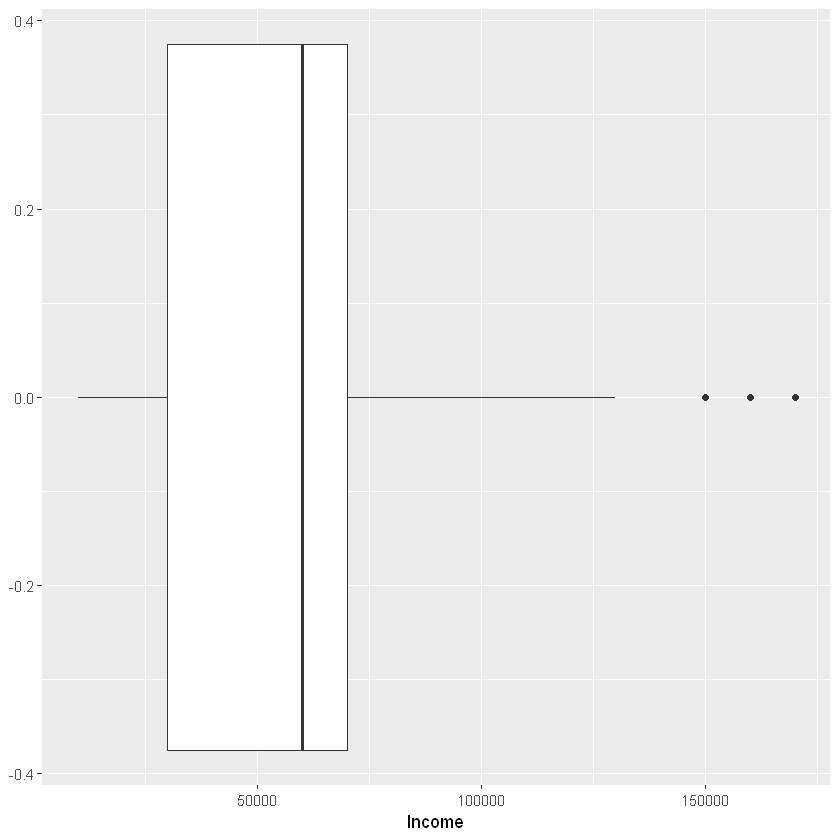

In [39]:
ggplot(data=bike_buyers,aes(x=Income))+geom_boxplot()

In [40]:
#to exctract those rows whose Income>140000
filter(bike_buyers,Income>140000)
which(bike_buyers['Income']>140000)

ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
27974,Single,Male,160000,2,High School,Management,Yes,4.000000,0-1 Miles,Pacific,33,Yes
11434,Married,Male,170000,5,Partial College,Professional,Yes,1.455096,0-1 Miles,Europe,55,No
17185,Married,Female,170000,4,Partial College,Professional,No,3.000000,5-10 Miles,Europe,48,Yes
15922,Married,Male,150000,2,High School,Professional,Yes,4.000000,0-1 Miles,Europe,48,No
14191,Married,Male,160000,4,Partial College,Professional,No,2.000000,10+ Miles,Europe,55,Yes
12705,Married,Male,150000,0,Bachelors,Management,Yes,4.000000,0-1 Miles,Pacific,37,Yes
16675,Single,Female,160000,0,Graduate Degree,Management,No,3.000000,0-1 Miles,Pacific,47,Yes
23608,Married,Female,150000,3,High School,Professional,Yes,3.000000,0-1 Miles,Europe,51,Yes
16009,Single,Male,170000,1,Graduate Degree,Management,No,4.000000,0-1 Miles,North America,66,No


[1]   7  13  44 122 179 260 322 357 830 994

In [41]:
remove_outliers=bike_buyers[-c(7,13,44,122,179,260,322,357,830,994),]
head(remove_outliers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [42]:
bike_buyers=('Income'=remove_outliers)
tail(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
995,13466,Married,Male,8e+04,5,Partial College,Professional,Yes,3,1-2 Miles,North America,46,No
996,23731,Married,Male,6e+04,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
997,28672,Single,Male,7e+04,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
998,11809,Married,Male,6e+04,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
999,19664,Single,Male,1e+05,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No
1000,12121,Single,Male,6e+04,3,High School,Professional,Yes,2,10+ Miles,North America,53,Yes


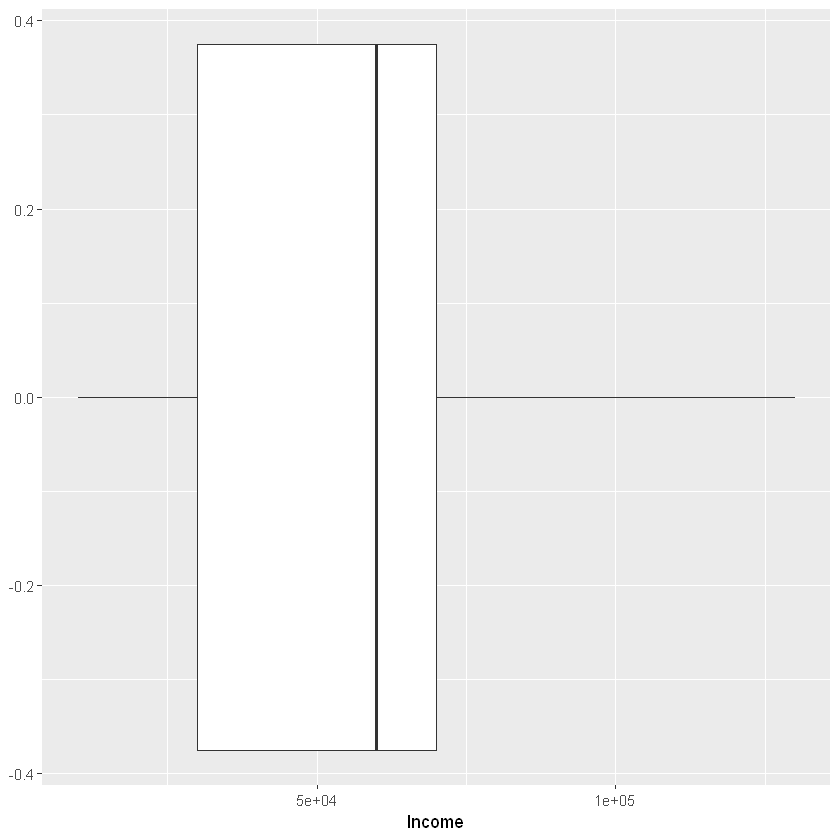

In [43]:
ggplot(data=bike_buyers,aes(x=Income))+geom_boxplot()

### Removing Age Outlier

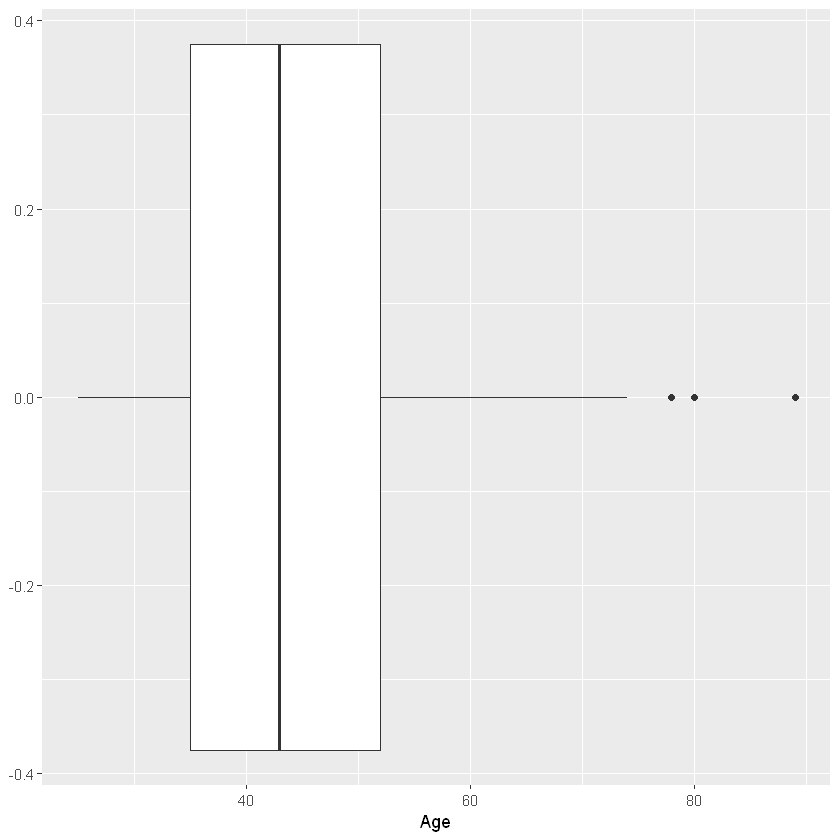

In [44]:
ggplot(data=bike_buyers,aes(x=Age))+geom_boxplot()

In [45]:
#to exctract those rows whose Cars>3
f=filter(bike_buyers,Age>75)
#print(f)
x=which(bike_buyers['Age']>75)
print(x)

[1] 246 368 394 588


In [46]:
remove_outliers=bike_buyers[-c(x),]
head(remove_outliers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [47]:
bike_buyers=('Age'=remove_outliers)
tail(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
995,13466,Married,Male,8e+04,5,Partial College,Professional,Yes,3,1-2 Miles,North America,46,No
996,23731,Married,Male,6e+04,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
997,28672,Single,Male,7e+04,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
998,11809,Married,Male,6e+04,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
999,19664,Single,Male,1e+05,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No
1000,12121,Single,Male,6e+04,3,High School,Professional,Yes,2,10+ Miles,North America,53,Yes


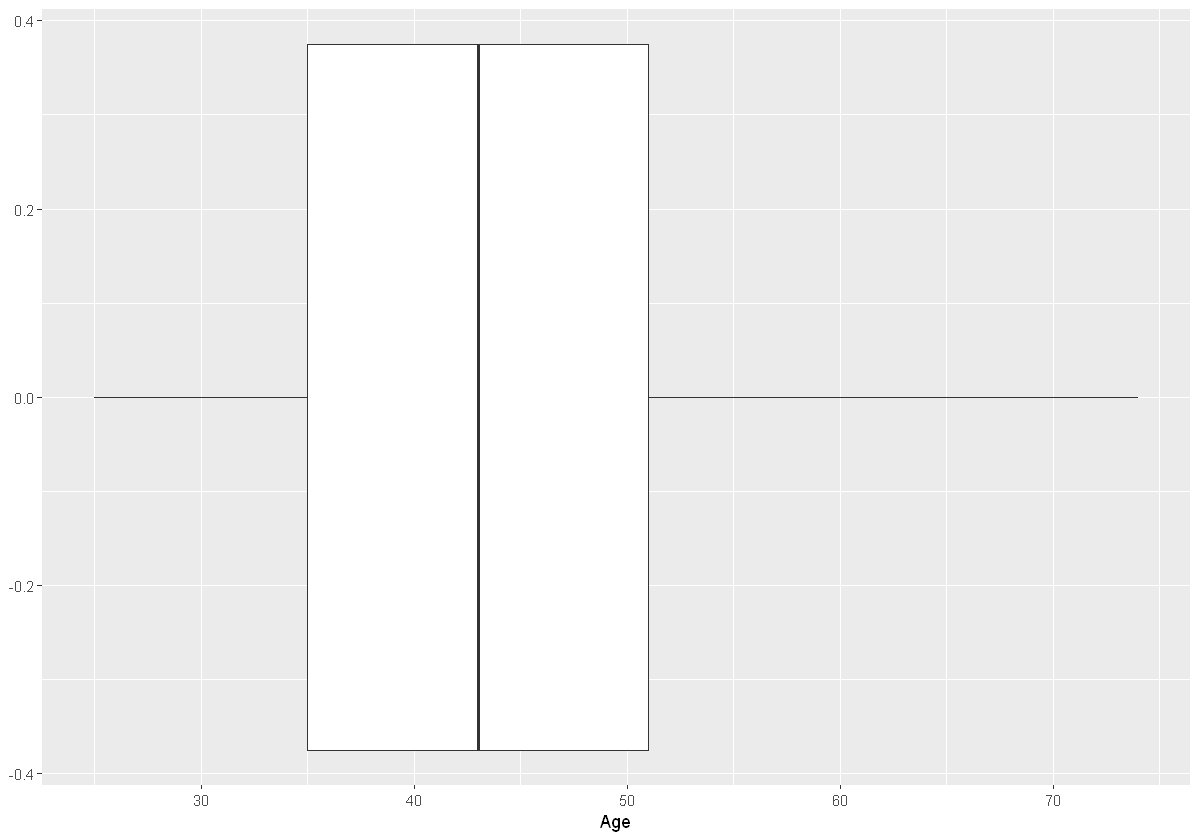

In [48]:
options(repr.plot.width=10,repr.plot.height=7)
ggplot(data=bike_buyers,aes(x=Age))+geom_boxplot()

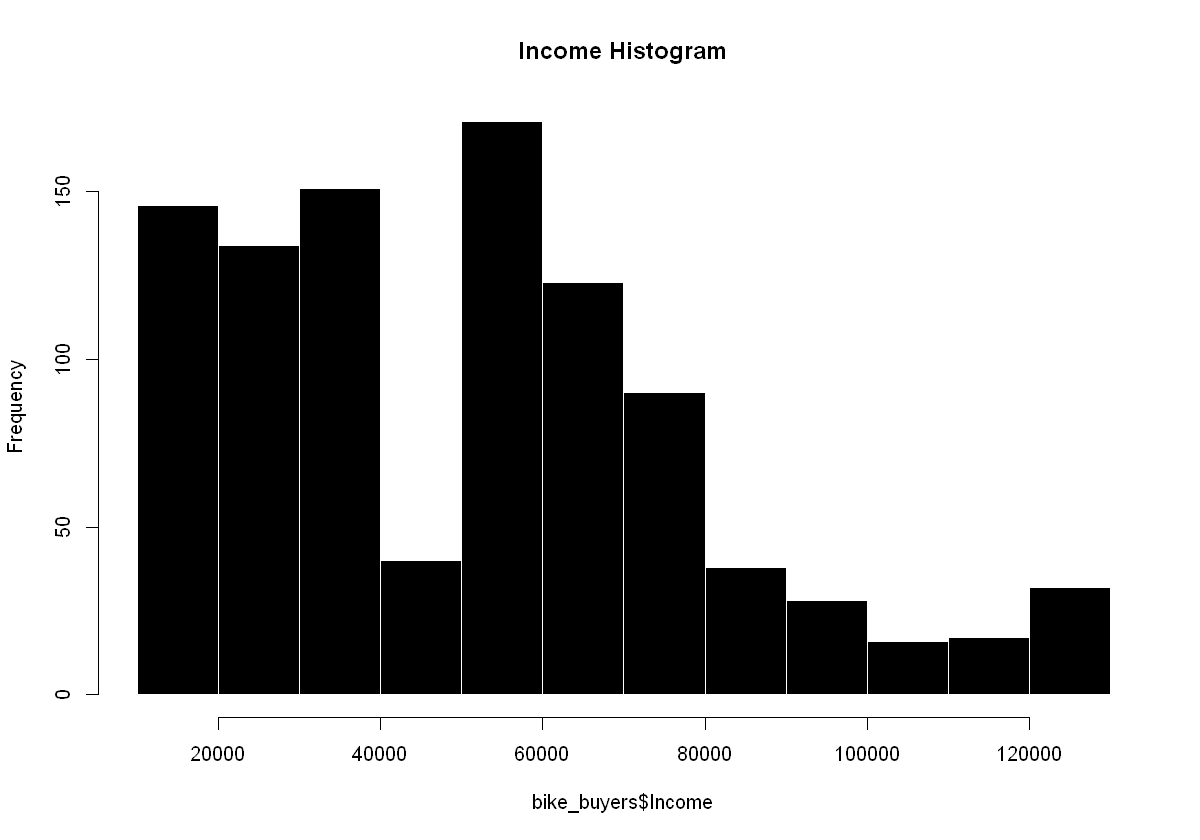

In [49]:
hist(bike_buyers$Income,col="black",border="white",main='Income Histogram')

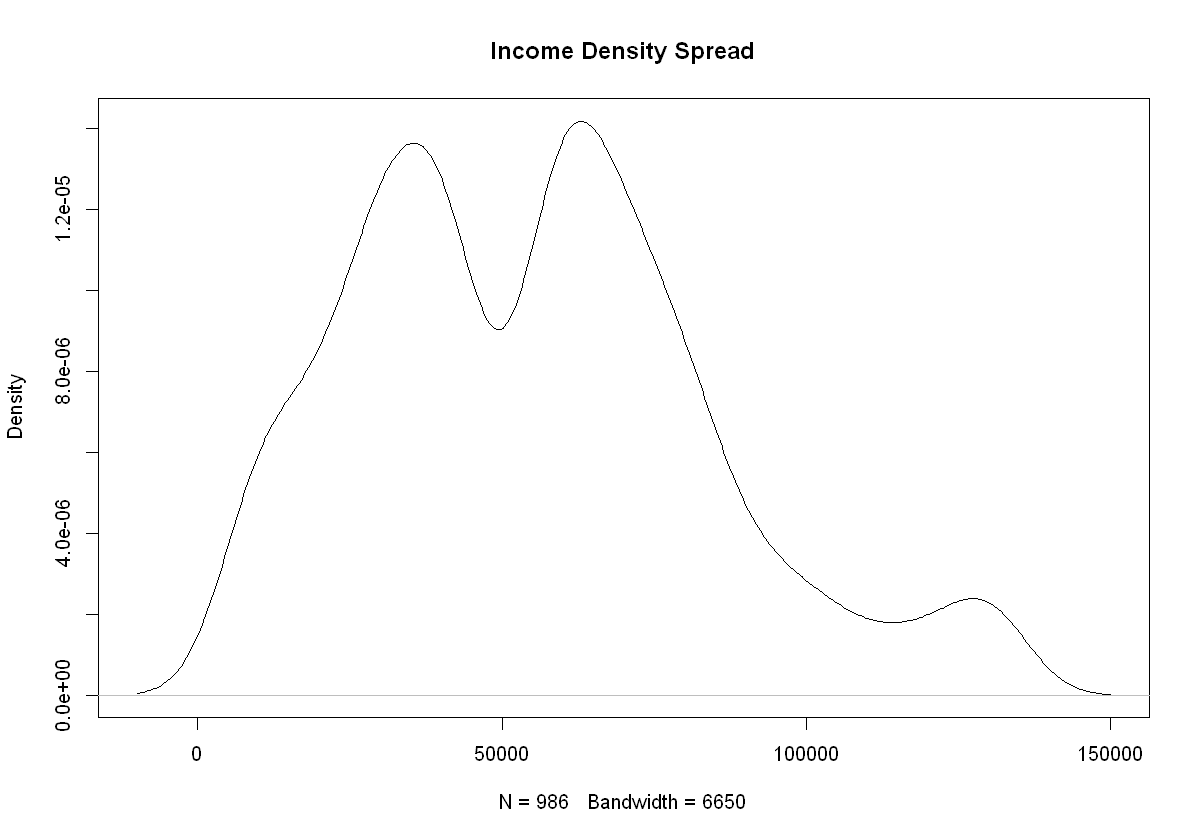

In [50]:
plot(density(bike_buyers$Income),main='Income Density Spread')

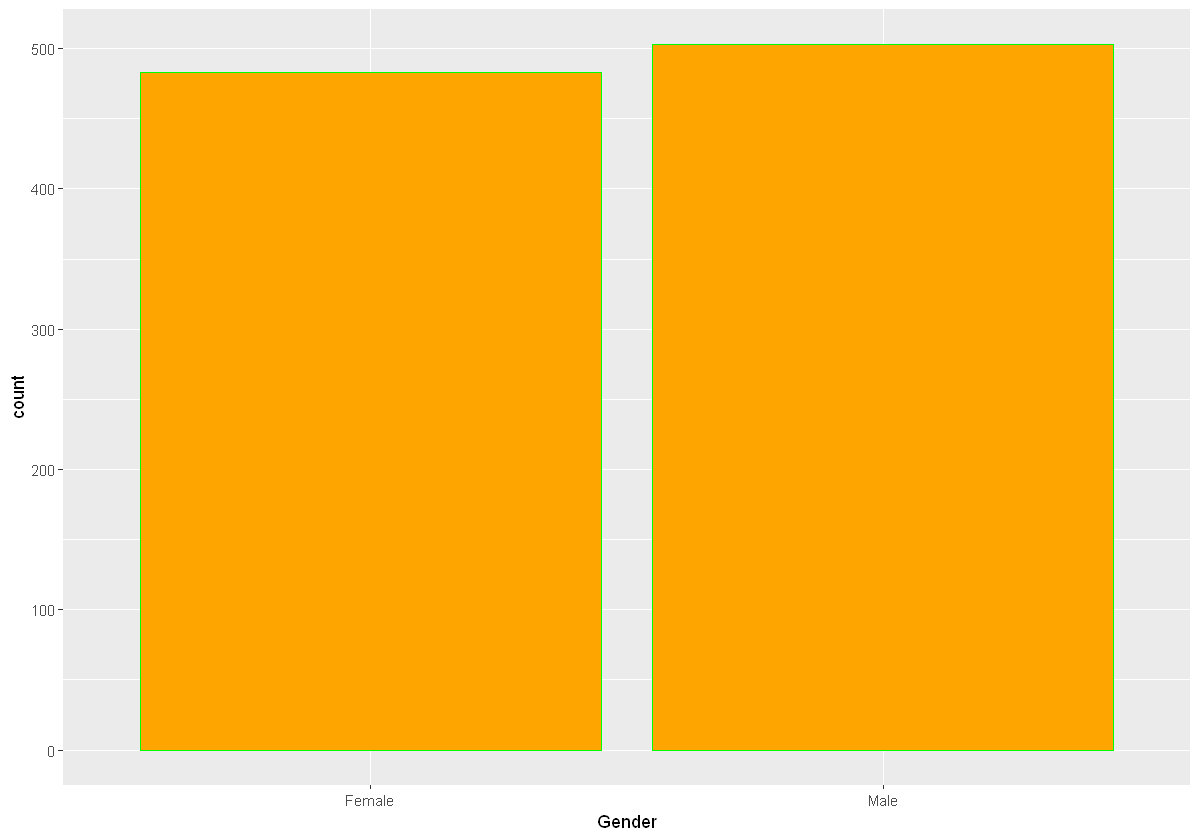

In [84]:
ggplot(data=bike_buyers,aes(x=Gender))+geom_bar(fill="orange",color='green')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



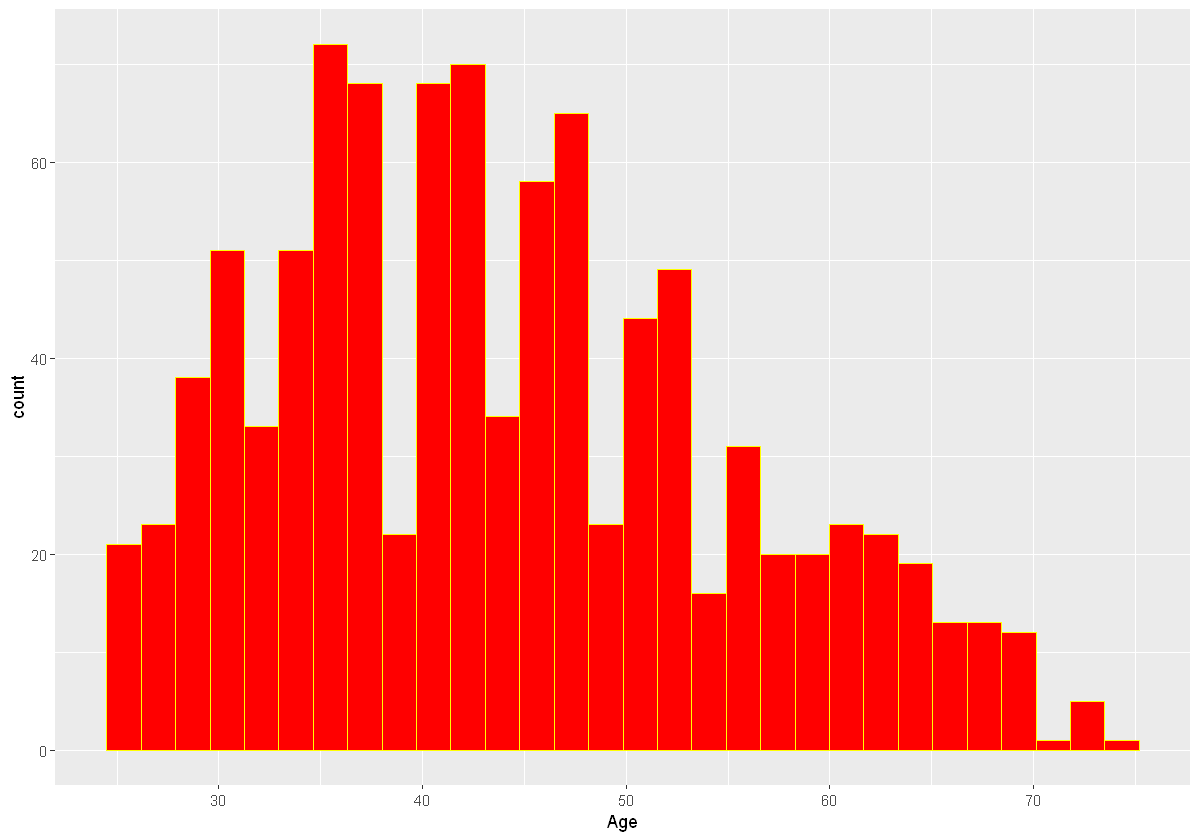

In [83]:
ggplot(bike_buyers,aes(x = Age))+geom_histogram(fill="red",color='yellow')

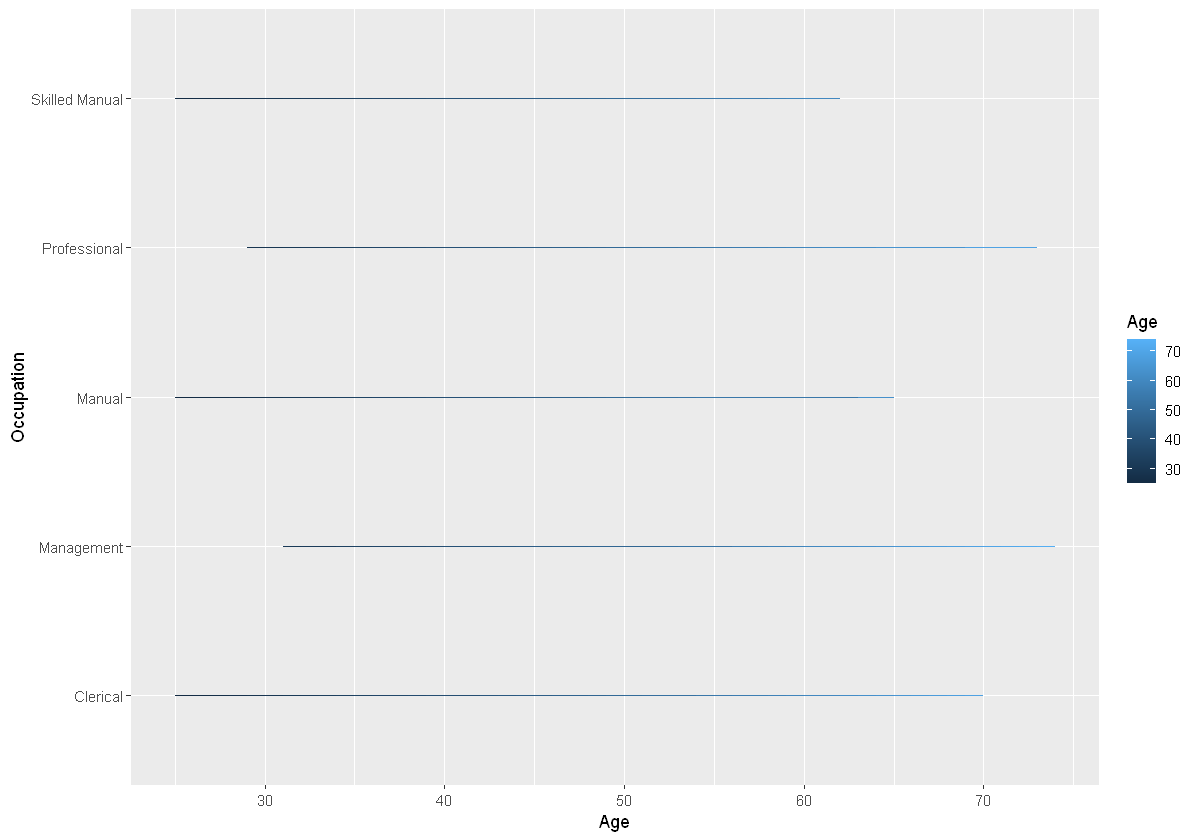

In [77]:
ggplot(bike_buyers,aes(x =Age, y=Occupation))+geom_line(aes(color=Age))

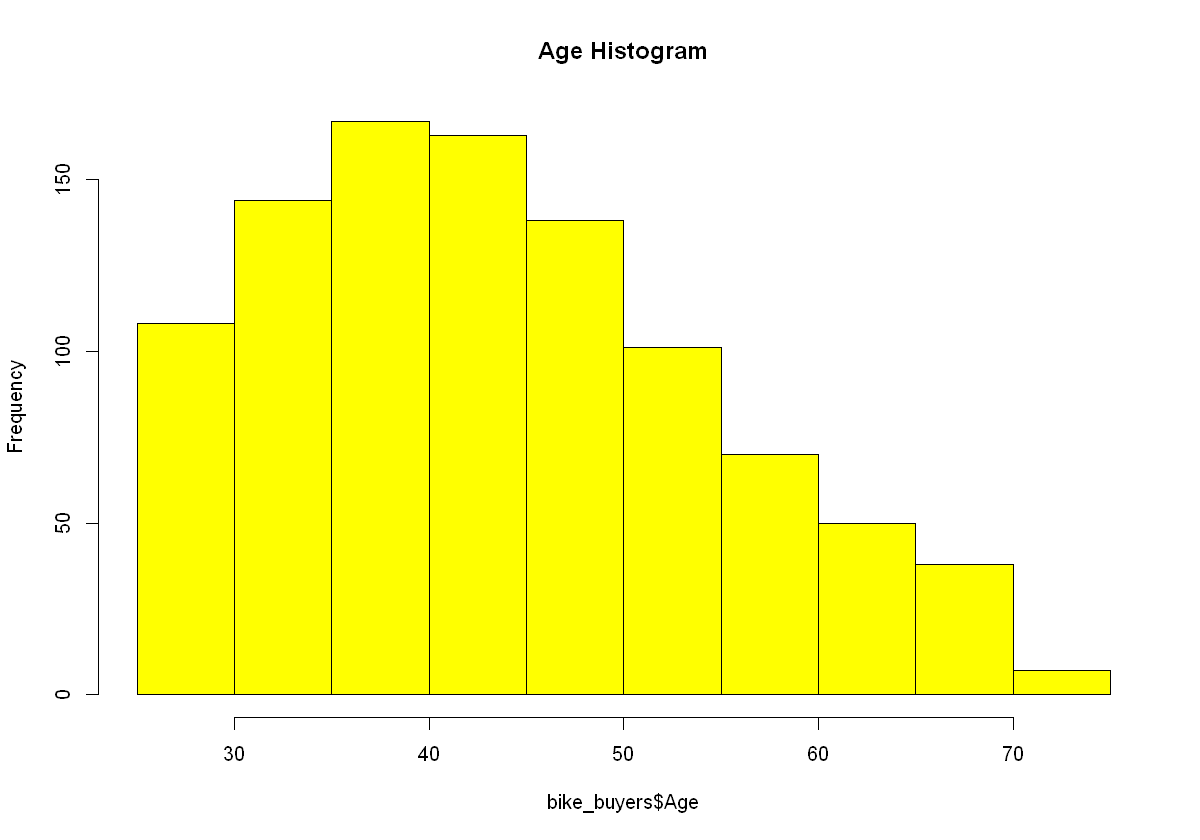

In [80]:
hist(bike_buyers$Age,col='yellow',border="black",main='Age Histogram')